# Aim 
Understand how to use Gradients to Control Composite Functions

# Introduction
## Why Control Composite Functions?
- Optimization in machine learning
- Finding maximum/minimum values
- Adjusting system parameters

In [131]:
# # Value Object Explained

# ## What is a Value Object?

# A Value object represents a variable in a computation and tracks two key pieces of information:
# 1. The current value of the variable
# 2. How this variable affects the final output (its gradient)

from graphviz import Digraph

from graphviz import Digraph

class Value:
    def __init__(self, data, label="", prev=[], op=""):
        self.data = data
        self.grad = 0
        self.label = label
        self.prev = prev
        self.op = op
        
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, prev=[self, other], op="+")
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, prev=[self, other], op="*")
        return out
    
    def __rmul__(self, other):
        return self * other
        
    def __repr__(self):
        return f"Value(label={self.label}, data={self.data}, grad={self.grad})"
    
    def _build(self):
        """builds a set of all nodes and edges in a graph"""
        nodes, edges = set(), set()
        
        def build(v):
            if v not in nodes:
                nodes.add(v)
                for child in v.prev:
                    edges.add((child, v))
                    build(child)
        build(self)
        return nodes, edges
    
    def draw_dot(self):
        """Creates a visualization of the computation graph"""
        dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
        
        nodes, edges = self._build()
        
        # Add all nodes to graph
        for n in nodes:
            uid = str(id(n))
            # Create a node label with data and optional label
            node_label = f"data {n.data:.4f}"
            if n.label:
                node_label += f" | label {n.label}"
                
            if n.grad:
                node_label += f" | grad {n.grad}"
            
            # Add the node as a box
            dot.node(name=uid, 
                    label=node_label,
                    shape='record')
            
            # If it's an operation result, add the operation node
            if n.op:
                op_id = uid + n.op
                dot.node(name=op_id, label=n.op, shape='circle')
                dot.edge(op_id, uid)
        
        # Add edges between nodes
        for n1, n2 in edges:
            dot.edge(str(id(n1)), str(id(n2)) + n2.op)
        
        return dot

# Understanding Our Function

We'll work with a simple composite function:

```
d = (a * b) + c
```

This function has three parts:

* Multiply a and b
* Add c to the result to get d

In [132]:
def abc(a, b, c):
    return (a * b) + c

# Calculating Gradients

## Numerical Method
We can approximate gradients using small changes

In [133]:
def partial_d(a, b, c, wrt):
    h = 0.001  # Small step size
    a_b_c = abc(a, b, c)
    if wrt == "a":
        a += h
    elif wrt == "b":
        b += h
    else:
        c += h
    a_b_c_h = abc(a, b, c)
    
    return (a_b_c_h - a_b_c) / h

gradients = [partial_d(2, -3, 10, 'a'), partial_d(2, -3, 10, 'b'), partial_d(2, -3, 10, 'c')]
print(f"gradients a=2, b=-3, c=10 {gradients}")

gradients a=2, b=-3, c=10 [-3.0000000000001137, 1.9999999999997797, 0.9999999999994458]


# Analytical Derivation

For function d = (a * b) + c

With respect to 'a' (∂d/∂a):
```
∂d/∂a = b
```
Because when we change a, effect is multiplied by b


With respect to 'b' (∂d/∂b):
```
∂d/∂b = a
```
Because when we change b, effect is multiplied by a


With respect to 'c' (∂d/∂c):
```
∂d/∂c = 1
```
Because c is added directly, no multiplication


Example at point (a=2, b=-3, c=10):
```
# Numerical verification
∂d/∂a = -3  # Gradient for a
∂d/∂b = 2   # Gradient for b
∂d/∂c = 1   # Gradient for c
```

# Visualization of the function with gradients


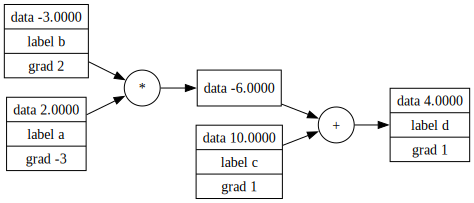

In [134]:
a = Value(2, label ='a')
b = Value(-3, label='b')
c = Value(10, label='c')
d = a*b + c
d.label = 'd'
a.grad = -3
b.grad = 2
c.grad = 1
d.grad = 1
d
d.draw_dot()

# What Gradients Tell Us

For point (2, -3, 10):

## a's gradient (-3) tells us:

* Increasing `a` decreases output (negative gradient)
* Effect is 3 times the change in `a`
* To increase output: decrease `a`
* To decrease output: increase `a`


## b's gradient (2) tells us:

* Increasing `b` increases output (positive gradient)
* Effect is 2 times the change in `b`
* To increase output: increase `b`
* To decrease output: decrease `b`


## c's gradient (1) tells us:

* Direct 1:1 relationship with output
* To increase output: increase c
* To decrease output: decrease c

# Controlling the Output
## To increase output (d):

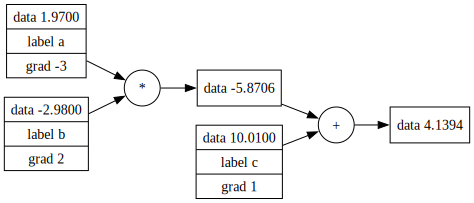

In [135]:
a = Value(2, label ='a')
b = Value(-3, label='b')
c = Value(10, label='c')
d = a*b + c
d.label = 'd'
a.grad = -3
b.grad = 2
c.grad = 1
d.grad = 1
d
learning_rate = 0.01

# Move in direction of gradient
a.data += learning_rate * a.grad  # 2 -> 1.97
b.data += learning_rate * b.grad  # -3 -> -2.98
c.data += learning_rate * c.grad  # 10 -> 10.01
d = a*b + c

# Result: Output increases from 4.0 to 4.1394
d.draw_dot()

## To increase output (d):


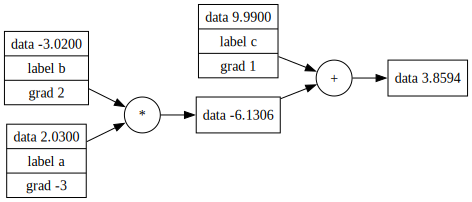

In [136]:
a = Value(2, label ='a')
b = Value(-3, label='b')
c = Value(10, label='c')
d = a*b + c
d.label = 'd'
a.grad = -3
b.grad = 2
c.grad = 1
d.grad = 1
d
learning_rate = 0.01

# Move in direction of gradient
a.data -= learning_rate * a.grad  # 2 -> 2.03
b.data -= learning_rate * b.grad  # -3 -> -3.02
c.data -= learning_rate * c.grad  # 10 -> 9.99
d = a*b + c

# Result: Output increases from 4.0 to 4.1394
d.draw_dot()

# Summary 
* Gradients provide a roadmap for controlling composite functions
* The sign tells us direction, magnitude tells us strength
* Small, controlled steps (learning rate) help precise adjustments